1. Setosa, Versicolor, Virginica
2. We have Length and Width of Petals & Length and Width if the Sepals (Centimeters)

### Understanding

1. Classification Problem - 3 class
2. Supervised Problem

### Data

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
X = iris_dataset.data
y = iris_dataset.target
labels = iris_dataset.target_names
features = iris_dataset.feature_names

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

In [5]:
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#help(train_test_split)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(105, 4)

In [11]:
X_test.shape

(45, 4)

## Understanding of Data

In [12]:
import pandas as pd
import numpy as np

In [13]:
iris_dataframe = pd.DataFrame(X_train, columns=features)
# help(pd.DataFrame)

In [14]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,2.4,3.7,1.0
1,6.3,2.8,5.1,1.5
2,6.4,3.1,5.5,1.8
3,6.6,3.0,4.4,1.4
4,7.2,3.6,6.1,2.5


In [15]:
iris_dataframe.shape

(105, 4)

In [16]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  105 non-null    float64
 1   sepal width (cm)   105 non-null    float64
 2   petal length (cm)  105 non-null    float64
 3   petal width (cm)   105 non-null    float64
dtypes: float64(4)
memory usage: 3.4 KB


In [17]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

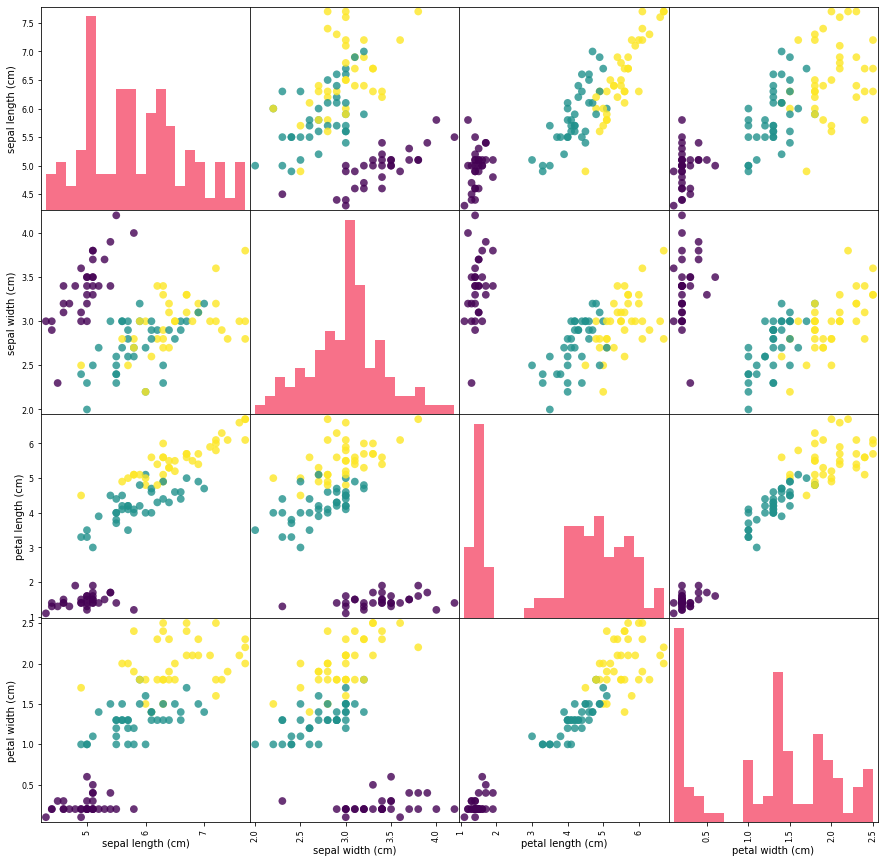

In [18]:
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15),marker='o',hist_kwds={'bins': 20}, s=60, c=y_train, alpha=.8)
# help(pd.plotting.scatter_matrix)

Let’s test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

In [22]:
models

[('LR', LogisticRegression(max_iter=1000)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVC', SVC(gamma='auto'))]

In [23]:
# Evaluate each model in turn
results = []
results_means = []
names = []
for name, model in models:
    kfold = StratifiedKFold( n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    results_means.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print(max(results_means))

goodAccIndex = results_means.index(max(results_means))

LR: 0.952727 (0.047378)
LDA: 0.970909 (0.044499)
KNN: 0.933636 (0.059620)
CART: 0.905455 (0.070559)
NB: 0.922727 (0.086650)
SVC: 0.943636 (0.046140)
0.9709090909090909


In [24]:
finalModel = models[goodAccIndex]

In [25]:
m = finalModel[1]
m.fit(X_train,y_train)
pred = m.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
# Dump the trained model (we can retrieve the dumped model whenever we wantz)
import pickle
pickle.dump(m,open("model.pkl","wb"))
print('Model dump SUCCESSFULL')

Model dump SUCCESSFULL
